<a href="https://colab.research.google.com/github/shireesh-kumar/Q-Learning_4x4_Grid_Project/blob/main/Q_Learning_4x4_Grid_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement

You are tasked with designing and analyzing a Q-learning algorithm to train an agent in a
grid-world environment. The environment is represented as a simple 4x4 grid, where each cell
represents a state, and the agent can perform one of four possible actions in each state: up,
down, left, and right. The agent starts at a random position in the grid and must learn to
navigate to a randomly placed goal state.


In [ ]:
#Owner : Shireesh Kumar Poral Ashok Kumar
#Email : shireeshkumar.198@gmail.com
#Reference Credits : https://www.youtube.com/watch?v=iKdlKYG78j4&list=PL1LIXLIF50uWNLUnQRb3xLlsErSLLXryE&index=11

#Importing required libraries


In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt


In [2]:
#Defining the environment
environment_rows = 4
environment_cols = 4

#Creating the Q table for the environment
#For different goal state we will create a separate Q table
q_values = {}  # A dictionary to hold Q-tables
q_differences_tracked_per_epoch_for_per_goal_state = []
set_of_average_rewards = []


for row in range(environment_rows):
    for col in range(environment_cols):
        goal_state = (row, col)
        q_values[goal_state] = np.zeros((environment_rows, environment_cols, 4))


#Actions
actions = ["up","right","down","left"]


#We will try to reduce the total negative rewards we get through our code and find the best path in the grid for a selected goal state and the beginning state
#Since the goal state could be any of the 4 states, we will set the selected goal state to +10 during each iteration

#Initialization , Goal State will be assigned later
rewards = np.full((environment_rows, environment_cols), -1.)

In [3]:
#Resetthe environment

def reset_env():
  global q_values
  global q_differences_tracked_per_epoch_for_per_goal_state

  q_values = {}  # A dictionary to hold Q-tables
  q_differences_tracked_per_epoch_for_per_goal_state = []
  set_of_average_rewards = []

  for row in range(environment_rows):
    for col in range(environment_cols):
      goal_state = (row, col)
      q_values[goal_state] = np.zeros((environment_rows, environment_cols, 4))

#Q-learning algorithm to train the agent to navigate the grid-world environment.


---
We work with various initial and desired goal states.





In [4]:
#Rules for the game defined through the methods here

#define a function that determines if the specified location is a goal state
def is_terminal_state(current_row_index, current_column_index):
  #if the reward for this location is -1, then it is not a goal state (i.e., it is a 'white square')
  if rewards[current_row_index, current_column_index] == -1.:
    return False
  else:
    return True


#define a function that will choose a random, non-goal starting location
def get_starting_location():
  #get a random row and column index
  current_row_index = np.random.randint(environment_rows)
  current_column_index = np.random.randint(environment_cols)

  #continue choosing random row and column indexes until a non-goal state is identified

  while is_terminal_state(current_row_index, current_column_index):
    current_row_index = np.random.randint(environment_rows)
    current_column_index = np.random.randint(environment_cols)
  return current_row_index, current_column_index


#define an epsilon greedy algorithm that will choose which action to take next (i.e., where to move next)
def get_next_action(current_row_index, current_column_index, epsilon,q_values):
  #if a randomly chosen value between 0 and 1 is less than epsilon,
  #then choose the most promising value from the Q-table for this state.
  if np.random.random() < epsilon:
    return np.argmax(q_values[current_row_index, current_column_index])
  else: #choose a random action
    return np.random.randint(4)


#define a function that will get the next location based on the chosen action
def get_next_location(current_row_index, current_column_index, action_index):
  new_row_index = current_row_index
  new_column_index = current_column_index
  if actions[action_index] == 'up' and current_row_index > 0:
    new_row_index -= 1
  elif actions[action_index] == 'right' and current_column_index < environment_cols - 1:
    new_column_index += 1
  elif actions[action_index] == 'down' and current_row_index < environment_rows - 1:
    new_row_index += 1
  elif actions[action_index] == 'left' and current_column_index > 0:
    new_column_index -= 1
  return new_row_index, new_column_index


#Define a function that will get the shortest path between any location within the warehouse that
#the robot is allowed to travel and the item packaging location.
def get_shortest_path(start_row_index, start_column_index,q_values):

  #return immediately if this is an invalid starting location
  if is_terminal_state(start_row_index, start_column_index):
    return []
  else: #if this is a 'legal' starting location
    current_row_index, current_column_index = start_row_index, start_column_index
    shortest_path = []
    shortest_path.append([current_row_index, current_column_index])
    #continue moving along the path until we reach the goal (i.e., the item packaging location)
    while not is_terminal_state(current_row_index, current_column_index):
      #get the best action to take
      action_index = get_next_action(current_row_index, current_column_index, 1.,q_values)
      #move to the next location on the path, and add the new location to the list
      current_row_index, current_column_index = get_next_location(current_row_index, current_column_index, action_index)
      shortest_path.append([current_row_index, current_column_index])
    return shortest_path



#Training and Testing code

---



In [9]:
#define training parameters


def training(epsilon, discount_factor,learning_rate):
  print("Training Started !")
  count = 0

  all_loc = [(0,0),(0,1),(0,2),(0,3),(1,0),(1,1),(1,2),(1,3),(2,0),(2,1),(2,2),(2,3),(3,0),(3,1),(3,2),(3,3)]

  set_of_average_rewards = [] # collection for each goal state

  for q in all_loc:

    temp_q_values = q_values[q]
    rewards[q[0],q[1]] = 10
    q_differences = []
    total_rewards = 0
    steps = 0
    average_rewards_per_episode = []  # List to store average rewards per episode


    print(f"Starting of new goal state {q}")

    for episode in range(1000):
      #get the starting location for this episode

      row_index, column_index = get_starting_location()

      #continue taking actions (i.e., moving) until we reach a terminal state
      #(i.e., until we reach the item packaging area or crash into an item storage location)
      while not is_terminal_state(row_index, column_index):
        #choose which action to take (i.e., where to move next)
        action_index = get_next_action(row_index, column_index, epsilon,temp_q_values)

        #perform the chosen action, and transition to the next state (i.e., move to the next location)
        old_row_index, old_column_index = row_index, column_index #store the old row and column indexes
        row_index, column_index = get_next_location(row_index, column_index, action_index)

        #receive the reward for moving to the new state, and calculate the temporal difference
        reward = rewards[row_index, column_index]
        total_rewards += reward
        steps += 1

        old_q_value = temp_q_values[old_row_index, old_column_index, action_index  ]
        temporal_difference = reward + (discount_factor * np.max(temp_q_values[row_index, column_index])) - old_q_value

        #update the Q-value for the previous state and action pair
        new_q_value = old_q_value + (learning_rate * temporal_difference)
        temp_q_values[old_row_index, old_column_index, action_index] = new_q_value

      #Keeping track of the Q table for changes and convergence
      q_diff = np.abs(temp_q_values - old_q_value)
      average_diff = np.mean(q_diff)
      q_differences.append(average_diff)

      # Calculate average reward for this episode
      if steps > 0:
          average_reward = total_rewards / steps
      else:
          average_reward = 0
      average_rewards_per_episode.append(average_reward)

    q_differences_tracked_per_epoch_for_per_goal_state.append(q_differences)

    set_of_average_rewards.append(average_rewards_per_episode)

    #resetting the rewards for new goal
    rewards[q[0],q[1]] = -1

    #updating the hyperparameters
    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    learning_rate = max(min_learning_rate, learning_rate * learning_rate_decay)


  print('Training complete!')
  print("Last Epsilon Value",epsilon)
  print("Last Learning Rate", learning_rate)
  return set_of_average_rewards


#Output Method:
def test_algorithm(start_loc_i,start_loc_j,goal_state_i,goal_state_j, q_table):
  global rewards
  #Setting the goal state as required by giving it 10 points
  rewards[goal_state_i][goal_state_j] = 10
  print(f"\033[1mTo travel from location {[start_loc_i,start_loc_j]} to {[goal_state_i,goal_state_j]} we will take the following path\033[0m")
  states = get_shortest_path(start_loc_i,start_loc_j,q_table)
  print(states)
  #Reinitializing the the rewards state so we could set a different goal state later
  rewards[goal_state_i][goal_state_j] = -1


Variable Meta Data for reference :

epsilon => EPSILON - the percentage of time when we should take the best action (instead of a random action)

discount_factor = > Discount Factor - discount factor for future rewards
  
learning_rate = > ALPHA the rate at which the AI agent should learn

#Executing Training pipeline

In [10]:
epsilon = 0.9
discount_factor = 0.9
learning_rate = 0.9


# Decay rates
epsilon_decay = 0.99
learning_rate_decay = 0.99

# Minimum values
min_epsilon = 0.1
min_learning_rate = 0.01

reset_env()

#training
set_of_average_rewards = training(epsilon, discount_factor,learning_rate)


Training Started !
Starting of new goal state (0, 0)
Starting of new goal state (0, 1)
Starting of new goal state (0, 2)
Starting of new goal state (0, 3)
Starting of new goal state (1, 0)
Starting of new goal state (1, 1)
Starting of new goal state (1, 2)
Starting of new goal state (1, 3)
Starting of new goal state (2, 0)
Starting of new goal state (2, 1)
Starting of new goal state (2, 2)
Starting of new goal state (2, 3)
Starting of new goal state (3, 0)
Starting of new goal state (3, 1)
Starting of new goal state (3, 2)
Starting of new goal state (3, 3)
Training complete!
Last Epsilon Value 0.7663119939853881
Last Learning Rate 0.7663119939853881


#Testing the model with a goal state and start state


In [14]:
#Find the optimal path between start location 0,0 to 2,2
#works for other locations as well ..

test_algorithm(0,0,2,2,q_values[(2,2)])

To travel from location [0, 0] to [2, 2] we will take the following path
[[0, 0], [1, 0], [2, 0], [2, 1], [2, 2]]


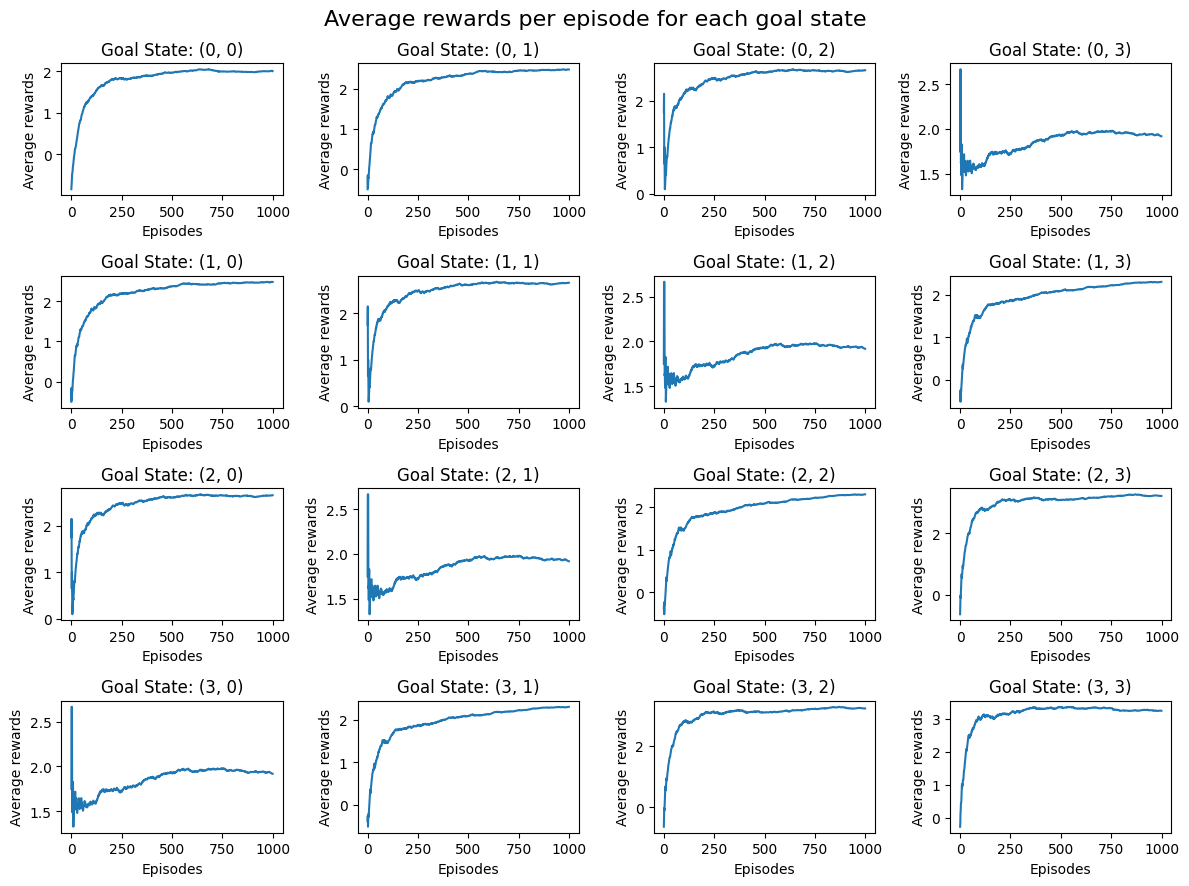

In [13]:
def plot_results():
  # print(f"\033[1mBelow results/plots are obtained for following hyperparameters\033[0m")
  # print(f"\033[1mEpsilon =\033[0m {epsilon}")
  # print(f"\033[1mDiscount Factor =\033[0m {discount_factor}")
  # print(f"\033[1mLearning Rate =\033[0m {learning_rate}")

  fig, axs = plt.subplots(4, 4, figsize=(12, 9))  # Create a 4x4 grid of subplots
  fig.suptitle('Average rewards per episode for each goal state', fontsize=16)

  for i in range(4):
      for j in range(4):
          index = i + j
          axs[i, j].plot(set_of_average_rewards[index])
          axs[i, j].set_xlabel('Episodes')
          axs[i, j].set_ylabel('Average rewards')
          axs[i, j].set_title(f'Goal State: ({i}, {j})')

  plt.tight_layout()
  plt.show()



#calling the plot results methods to analyse the model and the hyperparameters
plot_results()
